In [1]:
import pandas as pd
import numpy as np
import sqlite3
import functools as fn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
import seaborn as sns
pd.set_option("max_rows",5000)

In [2]:
ls

1550201769_PBL 5 recommendation data (1).csv
CustomerSegmentation.ipynb
README.md
Untitled.ipynb


In [3]:
df = pd.read_csv("1550201769_PBL 5 recommendation data (1).csv", encoding='latin-1')

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [6]:
df.shape

(4194, 181)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 181 columns):
Customers.id                      int64
Customers.fname                   object
Customers.lname                   object
Customers.company                 object
Customers.create_date             int64
Customers.status                  float64
Customers.mailing                 float64
Customers.reminders               float64
Customers.tax_exempt              float64
Customers.account_id              float64
Customers.sales_rep               float64
Customers.rewards                 float64
Customers.profile_id              float64
Customers.last_modified           int64
Customers.customer_type           float64
Orders.id                         int64
Orders.customer_id                int64
Orders.fname                      object
Orders.lname                      object
Orders.company                    object
Orders.order_number               object
Orders.reorder_id          

In [8]:
customer_df = df
orders_df = df
orderitems_df = df
products_df = df

In [9]:
dir(pd)

['Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseDtype',
 'SparseSeries',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_np_version_under1p16',
 '_np_version_under1p17',
 '_tslib

In [10]:
#startswith() to change column names and assign to appropriate table

In [11]:
customer_df = customer_df.drop([elem for elem in df if elem.startswith('Customer')== False], axis=1)
products_df = products_df.drop([elem for elem in df if elem.startswith('Product')== False], axis=1)
orders_df = orders_df.drop([elem for elem in df if elem.startswith('Orders')== False], axis=1)
orderitems_df = orderitems_df.drop([elem for elem in df if elem.startswith('Order_Items')== False], axis=1)

In [12]:
cnx = sqlite3.connect(':memory:')

In [13]:
customer_df.to_sql(name='customer_df', con=cnx, index=False)
products_df.to_sql(name='products_df', con=cnx, index=False)
orders_df.to_sql(name='orders_df', con=cnx, index=False)
orderitems_df.to_sql(name='orderitems_df', con=cnx, index=False)

In [14]:
customer_df = pd.read_sql('select * from customer_df', cnx)
products_df = pd.read_sql('select * from products_df', cnx)
orders_df = pd.read_sql('select * from orders_df', cnx)
orderitems_df = pd.read_sql('select * from orderitems_df', cnx)

In [15]:
customer_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,None,NaN,NaN,None,None,None,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,None,NaN,NaN,None,None,None,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,None,NaN,NaN,None,None,None,1437764354,0.0
3,4,James,Anderson,None,1386780263,NaN,NaN,None,NaN,NaN,None,None,None,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,None,NaN,NaN,None,None,None,1437764316,0.0


In [16]:
df_list = [customer_df, products_df, orders_df, orderitems_df]

In [17]:
df = pd.concat(df_list, axis=1)

In [18]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,None,NaN,NaN,...,None,None,1,57.20,44.00,None,None,NaN,None,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,None,NaN,NaN,...,None,None,4,5.00,1.87,None,None,NaN,None,2.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,None,NaN,NaN,...,None,None,1,68.78,52.50,None,None,NaN,None,NaN
3,4,James,Anderson,None,1386780263,NaN,NaN,None,NaN,NaN,...,None,None,1,19.56,12.62,None,None,NaN,None,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,None,NaN,NaN,...,None,None,1,36.05,25.75,None,None,NaN,None,NaN


In [19]:
df.shape

(4194, 181)

In [20]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [21]:
df1.shape

(4194, 74)

In [22]:
df2.shape

(4194, 107)

In [23]:
df1.head()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Products.id,Products.status,...,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Order_Items.flags
0,797,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0,2310.0,0.0,...,NaN,0.0,5284,3758,2310.0,1,57.20,44.00,NaN,NaN
1,3,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0,177.0,1.0,...,NaN,0.0,31,23,177.0,4,5.00,1.87,NaN,2.0
2,3,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0,1.0,0.0,...,NaN,0.0,11655,9531,1.0,1,68.78,52.50,NaN,NaN
3,4,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0,983.0,0.0,...,NaN,0.0,1816,29,983.0,1,19.56,12.62,NaN,NaN
4,5,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0,991.0,1.0,...,NaN,0.0,40,30,991.0,1,36.05,25.75,NaN,NaN


#### Non Numeric DataFrame

In [24]:
df2.head()

,Customers.fname,Customers.lname,Customers.company,Customers.reminders,Customers.sales_rep,Customers.rewards,Customers.profile_id,Products.product_type,Products.template,Products.name,...,Orders.gift_message,Orders.website,Orders.mailing,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.registry_item,Order_Items.related_id,Order_Items.account_id
0,Christy,Dill,Company0,None,None,None,None,None,sub-product-detail.html,"Basic Steel Rollators,Green",...,None,None,None,"Basic Rollators, Green",None,None,None,None,None,None
1,John,Smith,Company1,None,None,None,None,None,sub-product-detail.html,Urinary Drain Bags,...,None,None,None,"Urinary Drain Bags,0.000",None,None,None,None,None,None
2,John,Smith,Company1,None,None,None,None,None,sub-product-detail.html,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",...,None,None,None,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",None,None,None,None,None,None
3,James,Anderson,None,None,None,None,None,None,sub-product-detail.html,Basket for 2-Button Walkers,...,None,None,None,Basket for 2-Button Walkers,None,None,None,None,None,None
4,Abraham,Pollak,Company3,None,None,None,None,None,sub-product-detail.html,TENS 3000 Analog Unit,...,None,None,None,Tens Units,None,None,None,None,None,None


In [25]:
[elem for elem in df2]

['Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.reminders',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Products.product_type',
 'Products.template',
 'Products.name',
 'Products.display_name',
 'Products.menu_name',
 'Products.right_flag',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.shopping_gender',
 'Products.shopping_color',
 'Products.shopping_age',
 'Products.amazon_asin',
 'Products.amazon_type',
 'Products.amazon_item_type',
 'Products.google_shopping_id',
 'Products.google_shopping_type',
 'Products.google_shopping_cat',
 'Products.google_adwords',
 'Products.shopping_type',
 'Products.pricegrabber_cat',
 'Products.thefind_cat',
 'Products.quickbooks_id',
 'Products.price_break_type',
 'Products.price_breaks',
 'Products.short_description',
 'Products.long_description',
 'Products.websites',
 'Products.video',
 'Products.audio',
 'Products.seo_title',
 'Products.seo_description',
 'Products.seo_keyword

#### Remove attributes if they have less than 3 unique values or the missing more than 10% of values

In [26]:
df2 = df2.drop([elem for elem in df2 if len(df2[elem].unique()) <=3 or df2[elem].isnull().sum() > df2.shape[0]/10.0], axis=1)

In [27]:
df2.shape

(4194, 19)

In [28]:
df2.isnull().sum()

Customers.fname                    0
Customers.lname                    0
Products.name                    157
Products.shopping_brand          162
Products.shopping_mpn            160
Products.google_shopping_id      414
Products.google_shopping_type    215
Products.google_shopping_cat     183
Products.long_description        186
Products.seo_title               183
Products.seo_url                 157
Products.unit                    209
Products.family_id               325
Orders.fname                       0
Orders.lname                       0
Orders.order_number                0
Orders.tracking                  376
Orders.payment_type              384
Order_Items.product_name           0
dtype: int64

In [29]:
df2['Orders.payment_type'].unique()

array(['authorize.net', None, 'Credit Card', 'paypal', 'Check', 'Cash'],
      dtype=object)

In [30]:
df2 = df2.drop(['Products.shopping_mpn', 'Products.google_shopping_id', 'Products.long_description', 'Products.seo_title', 'Products.seo_url', 'Orders.tracking'], axis=1)

In [31]:
df2.shape

(4194, 13)

In [32]:
df2.isnull().sum()

Customers.fname                    0
Customers.lname                    0
Products.name                    157
Products.shopping_brand          162
Products.google_shopping_type    215
Products.google_shopping_cat     183
Products.unit                    209
Products.family_id               325
Orders.fname                       0
Orders.lname                       0
Orders.order_number                0
Orders.payment_type              384
Order_Items.product_name           0
dtype: int64

In [33]:
df2.dropna(inplace=True)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 4193
Data columns (total 13 columns):
Customers.fname                  3445 non-null object
Customers.lname                  3445 non-null object
Products.name                    3445 non-null object
Products.shopping_brand          3445 non-null object
Products.google_shopping_type    3445 non-null object
Products.google_shopping_cat     3445 non-null object
Products.unit                    3445 non-null object
Products.family_id               3445 non-null object
Orders.fname                     3445 non-null object
Orders.lname                     3445 non-null object
Orders.order_number              3445 non-null object
Orders.payment_type              3445 non-null object
Order_Items.product_name         3445 non-null object
dtypes: object(13)
memory usage: 376.8+ KB


In [35]:
df2.drop(['Customers.fname', 'Customers.lname', 'Orders.fname', 'Orders.lname', 'Orders.order_number'], axis=1, inplace=True)

In [36]:
df2 = pd.get_dummies(df2)

In [37]:
df2.head()

,"Products.name_1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large","Products.name_1/2"" self-adhesive hook material, 25 yard dispenser box, white","Products.name_1/2"" self-adhesive loop material, 25 yard dispenser box, white","Products.name_100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS","Products.name_100% Cotton Unisex Reversible Tops,Ceil Blue,MHS","Products.name_18"" Hamper Stands,Standard","Products.name_2"" self-adhesive loop material, 10 yard dispenser box, tan","Products.name_2"" self-adhesive loop material, 25 yard dispenser box, tan","Products.name_2-Ply Tissue/Poly Professional Towels,Not Applicable",Products.name_2000 Wheelchairs,...,Order_Items.product_name_Woven Sterile Gauze Sponges,"Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Large","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Medium","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Small","Order_Items.product_name_Wrist and Forearm Splints, Medium","Order_Items.product_name_Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Order_Items.product_name_Youth-Sized Walker Platform Attachment,"Order_Items.product_name_Zip-Style Biohazard Specimen Bags, Clear","Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder."
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Numeric DataFrame

In [38]:
df1 = pd.concat([df1, df2], axis=1)

In [39]:
df1.head()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Products.id,Products.status,...,Order_Items.product_name_Woven Sterile Gauze Sponges,"Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Large","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Medium","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Small","Order_Items.product_name_Wrist and Forearm Splints, Medium","Order_Items.product_name_Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Order_Items.product_name_Youth-Sized Walker Platform Attachment,"Order_Items.product_name_Zip-Style Biohazard Specimen Bags, Clear","Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder."
0,797,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0,2310.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0,177.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0,983.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0,991.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4193
Columns: 4158 entries, Customers.id to Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs,  Seat Size 22"/18", Includes Cup Holder.
dtypes: float64(4148), int64(10)
memory usage: 133.1 MB


In [41]:
df1.isnull().sum()

Customers.id                                                                                                                                                                                                                         0
Customers.create_date                                                                                                                                                                                                                0
Customers.status                                                                                                                                                                                                                  4093
Customers.mailing                                                                                                                                                                                                                 2080
Customers.tax_exempt                                                        

In [42]:
for elem in df1:
    print(elem+str(':'), df1[elem].unique())

Customers.id: [ 797    3    4 ... 3733 3735 3736]
Customers.create_date: [1426018724 1386089139 1386780263 ... 1463413245 1463416687 1463418049]
Customers.status: [nan  0.]
Customers.mailing: [nan  0.  1.]
Customers.tax_exempt: [nan  1.  0.]
Customers.account_id: [nan  7.  8.]
Customers.last_modified: [1437764306 1437764354 1437762646 ... 1463413245 1463416687 1463418049]
Customers.customer_type: [ 0.  1. nan  2.]
Products.id: [2.3100e+03 1.7700e+02 1.0000e+00 ... 1.5649e+04 2.7070e+03 5.6200e+02]
Products.status: [ 0.  1. nan  3.  2.  5.]
Products.vendor: [ 1. nan  2.  7.  4.  5. 11.  9. 10.]
Products.import_id: [ 3. nan  1.  4.  6. 20.  8. 21. 14. 19. 18.]
Products.list_price: [  80.7    14.41   96.29 ...   34.69   34.23 2107.5 ]
Products.price: [  57.64   10.29   68.78 ...   22.58   25.55 1099.  ]
Products.sale_price: [   nan   5.   125.99   8.99  11.99  70.99  31.06  32.66  19.99  33.94
  21.99 121.99  73.59  14.85  51.2   42.99  37.99 133.99 119.99  52.99
  16.99  74.99 129.99  14

Products.name_AngelStat Unisex Reversible V-Neck Scrub Tops,Misty Green,NTZ: [ 0. nan  1.]
Products.name_Ankle Prompts for Trekker Gait Trainer: [ 0. nan  1.]
Products.name_Anti Tippers with Wheels: [ 0. nan  1.]
Products.name_Antiseptic Towelettes: [ 0. nan  1.]
Products.name_Asorbs Ultra-Soft Plus Briefs,32"-42": [ 0. nan  1.]
Products.name_Automatic Blood Pressure Wrist Monitor: [ 0. nan  1.]
Products.name_Avant Gauze Non-Woven Non-Sterile Sponges: [ 0. nan  1.]
Products.name_Avant Gauze Non-Woven Sterile Sponges: [ 0. nan  1.]
Products.name_Avant Gauze Sterile Drain Sponge: [ 0. nan  1.]
Products.name_BariBrief Bariatric Briefs,65"-90": [ 0. nan  1.]
Products.name_Bariatric Aluminum Bath Bench with Back: [ 0. nan  1.]
Products.name_Bariatric Bath Bench without Back: [ 0. nan  1.]
Products.name_Bariatric Bedpans,Graphite: [ 0. nan  1.]
Products.name_Bariatric Drop-Arm Commode: [ 0. nan  1.]
Products.name_Bariatric Extra Wide Drop Arm Bedside Commode Seat: [ 0. nan  1.]
Products.name

Products.name_Deluxe Sentra Heavy Duty Extra Extra Wide Wheelchair: [ 0. nan  1.]
Products.name_Deluxe Static Air Overlay: [ 0. nan  1.]
Products.name_Deluxe Two Button Folding Walker: [ 0. nan  1.]
Products.name_DenTips Oral Swabsticks,Blue: [ 0. nan  1.]
Products.name_DenTips Oral Swabsticks,Green: [ 0. nan  1.]
Products.name_Denture Brushes: [ 0. nan  1.]
Products.name_Denture Containers,Aqua,8.000 OZ: [ 0. nan  1.]
Products.name_Designer Boxed Vinyl Exam Gloves,Clear,Small: [ 0. nan  1.]
Products.name_Die Cast Chrome Pill Crushers: [ 0. nan  1.]
Products.name_Digi-Flex Multi&reg; - Progressive Starter Pack - Frame and 4 Red, 1 Yellow, 1 Green, 1 Blue, 1 Black Buttons: [ 0. nan  1.]
Products.name_Disposable Emergency Blanket,Not Applicable: [ 0. nan  1.]
Products.name_Disposable Flat Bed Sheets,Not Applicable: [ 0. nan  1.]
Products.name_Disposable Foam Wheelchair Cushions: [ 0. nan  1.]
Products.name_Disposable Forehead Thermometer: [ 0. nan  1.]
Products.name_Disposable Knit Cuff 

Products.name_Hand Held Reacher: [ 0. nan  1.]
Products.name_Handheld Shower Head: [ 0. nan  1.]
Products.name_Handheld Shower Head Spray Massager: [ 0. nan  1.]
Products.name_Handheld Shower Head Spray with Diverter Valve: [ 0. nan  1.]
Products.name_Heavy Duty Bariatric Folding Bedside Commode Seat: [ 0. nan  1.]
Products.name_Heavy Duty Bariatric Footstool with Non Skid Rubber Platform: [ 0. nan  1.]
Products.name_Heavy Duty Bariatric Plastic Seat Transfer Bench: [ 0. nan  1.]
Products.name_Heavy Duty Bariatric Walker: [ 0. nan  1.]
Products.name_Heavy Duty Bariatric Walker Rollator with Large Padded Seat: [ 0. nan  1.]
Products.name_Heavy Duty Folding Cane Lightweight Adjustable with T Handle: [ 0. nan  1.]
Products.name_Hinged Raised Toilet Seats with Lids: [ 0. nan  1.]
Products.name_Home Bed Assist Rail: [ 0. nan  1.]
Products.name_Home Blood Pressure Kits,Black,Adult: [ 0. nan  1.]
Products.name_Hospital Bed Bedding in a Box: [ 0. nan  1.]
Products.name_Hospital Bed Fitted Shee

Products.name_Powder-Free Nitrile Exam Gloves,Blue,Large: [ 0. nan  1.]
Products.name_Powder-Free Nitrile Exam Gloves,Blue,Medium: [ 0. nan  1.]
Products.name_Powder-Free Nitrile Exam Gloves,Blue,Small: [ 0. nan  1.]
Products.name_Powder-Free Nitrile Exam Gloves,Blue,X-Large: [ 0. nan  1.]
Products.name_Power Mobility Armrest Bag: [ 0. nan  1.]
Products.name_Power Mobility Oxygen Cylinder Tank Carrier: [ 0. nan  1.]
Products.name_Power Mobility Scooter Arm Tote: [ 0. nan  1.]
Products.name_Power Scooter Sun Shade: [ 0. nan  1.]
Products.name_Precision Xtra Monitor System by Abbott Diabetes Care: [ 0. nan  1.]
Products.name_Premium Four-Panel Abdominal Binders,Large/X-Large: [ 0. nan  1.]
Products.name_Premium Four-Panel Abdominal Binders,Small/Medium: [ 0. nan  1.]
Products.name_Premium Knit Incontinence Underpants,Medium/Large: [ 0. nan  1.]
Products.name_Premium Knit Incontinence Underpants,X-Large: [ 0. nan  1.]
Products.name_Premium Plastic Raised Toilet Seat with Lock and Padded A

Products.name_Standard Short Leg Walkers,Black,Small: [ 0. nan  1.]
Products.name_Standard Smooth Exam Table Paper,Not Applicable: [ 0. nan  1.]
Products.name_Standard Surgical Masks: [ 0. nan  1.]
Products.name_Standard Trapeze Bar: [ 0. nan  1.]
Products.name_Standard Unisize Abdominal Binders,2X-Large: [ 0. nan  1.]
Products.name_Standard Unisize Abdominal Binders,Universal: [ 0. nan  1.]
Products.name_Standard Wheelchair Nylon Carry Pouch: [ 0. nan  1.]
Products.name_Steel Bariatric Commode: [ 0. nan  1.]
Products.name_Steel Bedside Commode: [ 0. nan  1.]
Products.name_Steel Commode With Microban: [ 0. nan  1.]
Products.name_Steel Drop Arm Bedside Commode with Padded Seat & Arms: [ 0. nan  1.]
Products.name_Steel Drop-Arm Commode: [ 0. nan  1.]
Products.name_Steel Elongated Bedside Commode: [ 0. nan  1.]
Products.name_Steel Folding Frame Commode: [ 0. nan  1.]
Products.name_Steel Oxygen Cylinder Rack: [ 0. nan  1.]
Products.name_Steel Transport Chair,F: 6   R: 8: [ 0. nan  1.]
Prod

Products.name_Walker Rollator with 6" Wheels, Fold Up Removable Back Support, and Padded Seat: [ 0. nan  1.]
Products.name_Walker Ski Glides: [ 0. nan  1.]
Products.name_Walker Ski/Glider: [ 0. nan  1.]
Products.name_Walking Crutches with Underarm Pad and Handgrip: [ 0. nan  1.]
Products.name_Wall mat hanger, 86" L x 8" H x 16" D, 10 capacity: [ 0. nan  1.]
Products.name_Wallaby Headrest Extension: [ 0. nan  1.]
Products.name_Wallaby Pediatric Folding Wheelchair: [ 0. nan  1.]
Products.name_Washable Cotton Material Gait Belts,Black: [ 0. nan  1.]
Products.name_Washable Cotton Material Gait Belts,Red, White & Blue Stripes: [ 0. nan  1.]
Products.name_Washable Cotton Material Gait Belts,Yellow: [ 0. nan  1.]
Products.name_Water Soluble Bags,Clear: [ 0. nan  1.]
Products.name_Waterproof Cast Protector: [ 0. nan  1.]
Products.name_Wedge Cushion with Stretch Cover: [ 0. nan  1.]
Products.name_Wheelchair Anti-Fold/Anti-Theft Devices: [ 0. nan  1.]
Products.name_Wheelchair Carry Pouch for Oxy

Products.google_shopping_type_Daily Living Aids > Transfer Equipment > Safety Pole: [ 0. nan  1.]
Products.google_shopping_type_Daily Living Aids > Transfer Equipment > Slings: [ 0. nan  1.]
Products.google_shopping_type_Drive Medical: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > Diagnostic > Ultrasound Gel: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > Exam Room Furniture > Exam Lamps: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > General Exam Supplies > Applicators and Swabs: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > General Exam Supplies > Cotton Balls & Rolls: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > General Exam Supplies > Drape Sheets: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > General Exam Supplies > Exam Table Paper: [ 0. nan  1.]
Products.google_shopping_type_Exam & Diagnostic Supplies > General Exam Supp

Products.google_shopping_type_Physical Therapy > Hot & Cold Therapy > Heating Pads: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Hot & Cold Therapy > Hot Packs: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Hot & Cold Therapy > Hot/Cold Packs & Accessories: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Hot & Cold Therapy > Ice Bags: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Hot & Cold Therapy > Infant Heel Warmers: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Hot & Cold Therapy > Topical Pain Relief: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Massage > Manual Massagers: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Modalities > Electrodes/TENS/Misc.: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Modalities > Traction: [ 0. nan  1.]
Products.google_shopping_type_Physical Therapy > Positioners > Heel/Elbow Protectors: [ 0. nan  1.]
Products.goog

Products.family_id_CanDoÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Twist-Bend-ShakeÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Exercisers: [ 0. nan  1.]
Products.family_id_CanDoÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ VariGripÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Hand Exercisers: [ 0. nan  1.]
Products.family_id_CanDoÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Web Hand Exercisers: [ 0. nan  1.]
Products.family_id_CanDoÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ aquatic exercise kit: [ 0. nan  1.]
Products.family_id_ColPaCÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Black Urethane Cold Packs: [ 0. nan  1.]
Products.family_id_ColPaCÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Blue Vinyl Cold Packs: [ 0. nan  1.]
Products.family_id_Digi-FlexÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ MultiÌÄ®ÕÌâå¢ÌÄå¢Ì¢Û_åÂÌÉå_ÌÄÛ_Ìâå¢ - Progressive Starter Pack: [ 0. nan  1.]
Products.family_id_Drop Foot Braces: [ 0. nan  1.]
Products.family_id_DycemÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Non-Slip Material Floor Mats: [ 0. nan  1.]
Products.family_id_DycemÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Non-Slip Material Pads: [ 0. nan  1.]
Products.family_id_ET4: [ 0. nan  1.]
Products.family_id_ET6: [ 0. nan  1.]
Products.family_id_English I

Products.family_id_PF02894: [ 0. nan  1.]
Products.family_id_PF02906: [ 0. nan  1.]
Products.family_id_PF02937: [ 0. nan  1.]
Products.family_id_PF02946: [ 0. nan  1.]
Products.family_id_PF02982: [ 0. nan  1.]
Products.family_id_PF03063: [ 0. nan  1.]
Products.family_id_PF03067: [ 0. nan  1.]
Products.family_id_PF03071: [ 0. nan  1.]
Products.family_id_PF03136: [ 0. nan  1.]
Products.family_id_PF03140: [ 0. nan  1.]
Products.family_id_PF03148: [ 0. nan  1.]
Products.family_id_PF03154: [ 0. nan  1.]
Products.family_id_PF03155: [ 0. nan  1.]
Products.family_id_PF03162: [ 0. nan  1.]
Products.family_id_PF03164: [ 0. nan  1.]
Products.family_id_PF03171: [ 0. nan  1.]
Products.family_id_PF03176: [ 0. nan  1.]
Products.family_id_PF03177: [ 0. nan  1.]
Products.family_id_PF03197: [ 0. nan  1.]
Products.family_id_PF03214: [ 0. nan  1.]
Products.family_id_PF03215: [ 0. nan  1.]
Products.family_id_PF03219: [ 0. nan  1.]
Products.family_id_PF03225: [ 0. nan  1.]
Products.family_id_PF03244: [ 0. n

Products.family_id_PF14434: [ 0. nan  1.]
Products.family_id_PF14563: [ 0. nan  1.]
Products.family_id_PF14590: [ 0. nan  1.]
Products.family_id_PF15489: [ 0. nan  1.]
Products.family_id_PF15491: [ 0. nan  1.]
Products.family_id_PF19512: [ 0. nan  1.]
Products.family_id_PF19544: [ 0. nan  1.]
Products.family_id_PF19559: [ 0. nan  1.]
Products.family_id_PF19768: [ 0. nan  1.]
Products.family_id_PF19915: [ 0. nan  1.]
Products.family_id_PF19916: [ 0. nan  1.]
Products.family_id_PF19917: [ 0. nan  1.]
Products.family_id_PF20058: [ 0. nan  1.]
Products.family_id_PF20059: [ 0. nan  1.]
Products.family_id_PF20065: [ 0. nan  1.]
Products.family_id_PF20640: [ 0. nan  1.]
Products.family_id_PF21440: [ 0. nan  1.]
Products.family_id_PF21875: [ 0. nan  1.]
Products.family_id_PF21895: [ 0. nan  1.]
Products.family_id_PF21896: [ 0. nan  1.]
Products.family_id_PF21897: [ 0. nan  1.]
Products.family_id_PF22355: [ 0. nan  1.]
Products.family_id_PF32157: [ 0. nan  1.]
Products.family_id_PF32158: [ 0. n

Order_Items.product_name_Baseline&reg; Dolorimeter - 22 pound Capacity: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; Dynamometer - Pneumatic Squeeze Bulb - 30 PSI Capacity, no reset: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; Dynamometer - Pneumatic Squeeze Bulb - 30 PSI Capacity, with reset: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; Dynamometer - Smedley Spring - Electronic - 200 lb Capacity: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; Finger Goniometer - Metal - Deluxe - 6 inch: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; MMT - Accessory - Dual Grip Handle (also for Wrist Dynamometer): [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; MMT - Hydraulic - Includes 3 Push, 2 Pull Attachments - digital LCD Gauge - 250 lb Capacity: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; Plastic Absolute+Axis&reg; Goniometer - 360 Degree Head - 12 inch Arms: [ 0. nan  1.]
Order_Items.product_name_Baseline&reg; Plastic Absolute+Axis&reg; Goniome

Order_Items.product_name_Caring Supra Form Sterile Conforming Bandages: [ 0. nan  1.]
Order_Items.product_name_Caring Transparent Adhesive Tape, Transparent: [ 0. nan  1.]
Order_Items.product_name_Caring Woven Non-Sterile Gauze Sponges: [ 0. nan  1.]
Order_Items.product_name_Caring Woven Sterile Gauze Sponges: [ 0. nan  1.]
Order_Items.product_name_CarraScent Odor Eliminators, 1.000 OZ: [ 0. nan  1.]
Order_Items.product_name_CarraScent Odor Eliminators, 8.000 OZ: [ 0. nan  1.]
Order_Items.product_name_Carrington Moisture Barrier Cream with Zinc, 99.00 ML: [ 0. nan  1.]
Order_Items.product_name_Carrington Moisture Barrier Cream, 3.500 OZ: [ 0. nan  1.]
Order_Items.product_name_Cast Boots, Large: [ 0. nan  1.]
Order_Items.product_name_Cast Boots, Small: [ 0. nan  1.]
Order_Items.product_name_Cast Boots, X-Large: [ 0. nan  1.]
Order_Items.product_name_Castile Soap Towelettes by PDI Inc: [ 0. nan  1.]
Order_Items.product_name_Catheter Leg Straps, 29.00 IN: [ 0. nan  1.]
Order_Items.product

Order_Items.product_name_Emesis Bags, Blue: [ 0. nan  1.]
Order_Items.product_name_Emesis Bags, Blue, 36.000: [ 0. nan  1.]
Order_Items.product_name_Emesis Bags, Blue, 36.000 OZ: [ 0. nan  1.]
Order_Items.product_name_Emesis Bags,Blue - 24 EA: [ 0. nan  1.]
Order_Items.product_name_Empower Rollator, Black: [ 0. nan  1.]
Order_Items.product_name_Empower Rollator, Blue, 8": [ 0. nan  1.]
Order_Items.product_name_Enamel Grab Bar: [ 0. nan  1.]
Order_Items.product_name_Enema Bag Sets, 1500.0 ML: [ 0. nan  1.]
Order_Items.product_name_Enema Sets, 1500.0 ML: [ 0. nan  1.]
Order_Items.product_name_Enteral Feeding and Irrigation Syringes, 60.00: [ 0. nan  1.]
Order_Items.product_name_Enteral Feeding and Irrigation Syringes, 60.00 MM: [ 0. nan  1.]
Order_Items.product_name_Enzymatic Odor Eliminator, 2.000 OZ: [ 0. nan  1.]
Order_Items.product_name_Ergonomic Hand Held Shower: [ 0. nan  1.]
Order_Items.product_name_Eudermic MP 12" High Risk Exam Gloves, Blue, X-Large: [ 0. nan  1.]
Order_Items.pr

Order_Items.product_name_Hydraulic Patient Lift with Six Point Cradle, 3" Casters, Silver Vein: [ 0. nan  1.]
Order_Items.product_name_Hydrocerin Cream: [ 0. nan  1.]
Order_Items.product_name_Impact Reducing Able Tripod Cane Tip: [ 0. nan  1.]
Order_Items.product_name_Infant Head Warmers, Blue Stripe: [ 0. nan  1.]
Order_Items.product_name_Infant Head Warmers, Pink Stripe: [ 0. nan  1.]
Order_Items.product_name_Infant Heel Warmers: [ 0. nan  1.]
Order_Items.product_name_Inflatable Vinyl Ring Cushion: [ 0. nan  1.]
Order_Items.product_name_Instant Read Digital Temple Thermometers: [ 0. nan  1.]
Order_Items.product_name_Insulated Carafes, Clear W/Blue Lid, 32.000 OZ: [ 0. nan  1.]
Order_Items.product_name_Insulated Carafes, Clear W/Blue Lid, 32.000 OZ 2 Pack: [ 0. nan  1.]
Order_Items.product_name_Isolation Face Masks with Earloops, Yellow: [ 0. nan  1.]
Order_Items.product_name_JumboJug Large Volume Suction Canister, 13 Liters: [ 0. nan  1.]
Order_Items.product_name_K1 Basic Extra-Wide 

Order_Items.product_name_Medline Silent Knight Pill Crusher: [ 0. nan  1.]
Order_Items.product_name_Medline Silent Knight Pill Crusher,: [ 0. nan  1.]
Order_Items.product_name_Medline Silent Knight Pill Crusher, 200 Free Pouches : [ 0. nan  1.]
Order_Items.product_name_Medline Silent Knight Pill Crusher, 200 pouches included: [ 0. nan  1.]
Order_Items.product_name_Medline Steel Transport Chair, Chrome Plated, Wheels Front 8" Back 8", Seat Size 19"/16", Cap. 300 Lbs.: [ 0. nan  1.]
Order_Items.product_name_Medline Steel Transport Chair, Red, Chrome Plated, Wheels Front 6" Back 8", Seat Size 19"/16", Cap. 300 Lbs.: [ 0. nan  1.]
Order_Items.product_name_Medline Sterile Alcohol Pre Pads, Large: [ 0. nan  1.]
Order_Items.product_name_Medline Sterile Alcohol Pre Pads, Medium: [ 0. nan  1.]
Order_Items.product_name_Medline Sterile Alcohol Prep Pads, Large: [ 0. nan  1.]
Order_Items.product_name_Medline Sterile Alcohol Prep Pads, Medium: [ 0. nan  1.]
Order_Items.product_name_Medline Sterile 

Order_Items.product_name_Protection Plus Polymer Underpads, Green, 36" X 36": [ 0. nan  1.]
Order_Items.product_name_Protection Plus Polymer-Filled Underpads, Green: [ 0. nan  1.]
Order_Items.product_name_Protection Plus Polymer-Filled Underpads, Green, 30" X 36": [ 0. nan  1.]
Order_Items.product_name_Protection Plus Super Protective Adult Underwear, 2X-Large: [ 0. nan  1.]
Order_Items.product_name_Protection Plus Super Protective Adult Underwear, 58.00: [ 0. nan  1.]
Order_Items.product_name_Protection Plus Super Protective Adult Underwear, 80.00: [ 0. nan  1.]
Order_Items.product_name_Protection Plus Super Protective Adult Underwear, Small: [ 0. nan  1.]
Order_Items.product_name_Protection Plus Super Protective Adult Underwear, X-Large: [ 0. nan  1.]
Order_Items.product_name_Protective Polyethylene Disposable Aprons, White: [ 0. nan  1.]
Order_Items.product_name_Push-Button Aluminum Crutches: [ 0. nan  1.]
Order_Items.product_name_Quick 'N Easy Comfort Mattress: [ 0. nan  1.]
Order_

Order_Items.product_name_Smooth Bottom Shoe Covers, Blue, Regular/Large: [ 0. nan  1.]
Order_Items.product_name_Sock and Stocking Aid, Blue/White, No: [ 0. nan  1.]
Order_Items.product_name_Sodium Bicarbonate: [ 0. nan  1.]
Order_Items.product_name_Sodium Chloride Tablets: [ 0. nan  1.]
Order_Items.product_name_Sofnit 300 Reusable Underpads, Pink, White: [ 0. nan  1.]
Order_Items.product_name_Soft Foam Cervical Collar: [ 0. nan  1.]
Order_Items.product_name_Soft-Fit Knitted Contour Sheets, Blue: [ 0. nan  1.]
Order_Items.product_name_Soft-Fit Knitted Contour Sheets, White, Blue: [ 0. nan  1.]
Order_Items.product_name_Solstice Nitrile Powder-Free Exam Gloves, Dark Blue, Large: [ 0. nan  1.]
Order_Items.product_name_Solstice Nitrile Powder-Free Exam Gloves, Dark Blue, Medium: [ 0. nan  1.]
Order_Items.product_name_Solstice Nitrile Powder-Free Exam Gloves, Dark Blue, Small: [ 0. nan  1.]
Order_Items.product_name_Solstice Nitrile Powder-Free Exam Gloves, Dark Blue, X-Large: [ 0. nan  1.]
O

Order_Items.product_name_Ultra Stretch Synthetic Exam Gloves, Medium: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Classic Adult Briefs, Medium: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Classic Adult Briefs, Regular: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Classic Adult Briefs, X-Large: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Disposable Dry Cleansing Cloth, White: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Disposable Dry Cleansing Cloth, White, 7" X 13": [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Plus Cloth-Like Adult Briefs, Regular: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Plus Cloth-Like Adult Briefs, XX-Large: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Plus Incontinence Liners, Purple: [ 0. nan  1.]
Order_Items.product_name_Ultra-Soft Plus Incontinence Liners, Purple, 14" X 25.5": [ 0. nan  1.]
Order_Items.product_name_UltraFlex Male External Catheters, Large: [ 0. nan  1.]
Order_Items.product_name_UltraFlex Male Exter

In [43]:
df1 = df1.drop(['Customers.status', 'Customers.mailing', 'Customers.tax_exempt', 
                'Customers.account_id', 'Customers.customer_type', 'Products.id', 
                'Products.status','Products.vendor', 'Products.import_id', 
                'Products.flags', 'Products.left_flag', 'Products.shopping_gtin', 
                'Products.shopping_flags', 'Products.shopping_cat', 
                'Products.shopzilla_cat', 'Products.qb_edit_sequence',
                'Products.seo_category','Products.upc','Products.override_markup',
                'Products.import_flags','Products.map_price','Products.google_shopping_label', 
                'Products.saved_status', 'Orders.external_id', 'Orders.shipping', 
                'Orders.coupon_id', 'Orders.weight','Orders.payment_status',
                'Orders.payment_amount','Orders.customer_type', 'Order_Items.flags',
                'Orders.partial_ship', 'Order_Items.product_id', 'Orders.partial_ship',
                'Orders.flags', 'Products.amazon_price', 'Orders.status', 'Order_Items.id',
                'Order_Items.parent', 'Products.length', 'Products.width', 'Products.height'], axis=1)

In [44]:
df1[df1['Products.taxable'] == 0].shape

(175, 4117)

In [45]:
df1['Order_Items.reorder_frequency'] = df1['Order_Items.reorder_frequency'].fillna(0)
df1['Products.taxable'] = df1['Products.taxable'].fillna(0)
df1['Products.sale_price'] = df1['Products.sale_price'].fillna(df['Products.price'])

In [46]:
df1.head()

,Customers.id,Customers.create_date,Customers.last_modified,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.case_qty,...,Order_Items.product_name_Woven Sterile Gauze Sponges,"Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Large","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Medium","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Small","Order_Items.product_name_Wrist and Forearm Splints, Medium","Order_Items.product_name_Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Order_Items.product_name_Youth-Sized Walker Platform Attachment,"Order_Items.product_name_Zip-Style Biohazard Specimen Bags, Clear","Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder."
0,797,1426018724,1437764306,80.70,57.64,57.64,44.00,1.463163e+09,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1386089139,1437764354,14.41,10.29,5.00,1.87,1.462370e+09,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1386089139,1437764354,96.29,68.78,68.78,52.50,1.463163e+09,1.0,800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1386780263,1437762646,27.38,19.56,19.56,12.62,1.462595e+09,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1386861599,1437764316,50.47,36.05,36.05,25.75,1.462370e+09,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df1.isnull().sum()

Customers.id                                                                                                                                                                                                                         0
Customers.create_date                                                                                                                                                                                                                0
Customers.last_modified                                                                                                                                                                                                              0
Products.list_price                                                                                                                                                                                                                177
Products.price                                                              

In [48]:
for elem in df1:
    if df1[elem].isnull().sum() > df.shape[1]/10:
        df1[elem] = df1[elem].dropna()

In [49]:
df1.shape

(4194, 4117)

In [50]:
def getelbowplot(df_in):

    sse = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df_in)
        sse.append(km.inertia_)
        
    plt.plot(K, sse, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Plot')

In [51]:
df1.shape

(4194, 4117)

In [52]:
df1.head()

,Customers.id,Customers.create_date,Customers.last_modified,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.case_qty,...,Order_Items.product_name_Woven Sterile Gauze Sponges,"Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Large","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Medium","Order_Items.product_name_Wrist and Forearm Splint with Abducted Thumb, Small","Order_Items.product_name_Wrist and Forearm Splints, Medium","Order_Items.product_name_Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Order_Items.product_name_Youth-Sized Walker Platform Attachment,"Order_Items.product_name_Zip-Style Biohazard Specimen Bags, Clear","Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder."
0,797,1426018724,1437764306,80.70,57.64,57.64,44.00,1.463163e+09,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1386089139,1437764354,14.41,10.29,5.00,1.87,1.462370e+09,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1386089139,1437764354,96.29,68.78,68.78,52.50,1.463163e+09,1.0,800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1386780263,1437762646,27.38,19.56,19.56,12.62,1.462595e+09,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1386861599,1437764316,50.47,36.05,36.05,25.75,1.462370e+09,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
[print(elem) for elem in df1]

Customers.id
Customers.create_date
Customers.last_modified
Products.list_price
Products.price
Products.sale_price
Products.cost
Products.last_modified
Products.taxable
Products.case_qty
Products.hygienic
Products.shipping_length
Products.shipping_width
Products.shipping_height
Products.shipping_weight
Orders.id
Orders.customer_id
Orders.reorder_id
Orders.subtotal
Orders.tax
Orders.coupon_amount
Orders.fee_amount
Orders.discount_amount
Orders.total
Orders.balance_due
Orders.payment_date
Orders.placed_date
Orders.updated_date
Orders.shipped_date
Order_Items.qty
Order_Items.price
Order_Items.cost
Order_Items.reorder_frequency
Products.name_1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large
Products.name_1/2" self-adhesive hook material, 25 yard dispenser box, white
Products.name_1/2" self-adhesive loop material, 25 yard dispenser box, white
Products.name_100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS
Products.name_100% Cotton Unisex Reversible Tops,Ceil Blu

Products.family_id_PF04751
Products.family_id_PF04755
Products.family_id_PF04759
Products.family_id_PF04765
Products.family_id_PF04773
Products.family_id_PF04774
Products.family_id_PF04782
Products.family_id_PF04792
Products.family_id_PF04799
Products.family_id_PF04801
Products.family_id_PF04802
Products.family_id_PF04805
Products.family_id_PF04825
Products.family_id_PF04829
Products.family_id_PF04832
Products.family_id_PF04834
Products.family_id_PF04838
Products.family_id_PF04839
Products.family_id_PF04840
Products.family_id_PF04844
Products.family_id_PF04845
Products.family_id_PF04871
Products.family_id_PF04872
Products.family_id_PF04878
Products.family_id_PF04882
Products.family_id_PF04903
Products.family_id_PF04962
Products.family_id_PF04963
Products.family_id_PF04970
Products.family_id_PF04974
Products.family_id_PF04977
Products.family_id_PF04987
Products.family_id_PF04991
Products.family_id_PF04998
Products.family_id_PF05003
Products.family_id_PF05005
Products.family_id_PF05011
P

Order_Items.product_name_Patient Lift Sling with Head Support and Commode Opening, 53" x 30"
Order_Items.product_name_Patient Lift Sling, Canvas
Order_Items.product_name_Pediatric Folding Walkers, Child
Order_Items.product_name_Pediatric Folding Walkers, Green, 5"
Order_Items.product_name_Pediatric Folding Walkers, Green, Junior
Order_Items.product_name_Pediatric Folding Walkers, Pediatric
Order_Items.product_name_Pediatric Folding Walkers, Red, Pediatric
Order_Items.product_name_Pediatric Non-Folding Walker, 3"
Order_Items.product_name_PerforMAX Unisex One-Pocket Reversible Scrub Tops, Ceil Blue, NTH
Order_Items.product_name_PerforMAX Unisex Reversible Drawstring Scrub Pants, Ceil Blue, NTH
Order_Items.product_name_Perineal Cold Packs
Order_Items.product_name_Perineal Irrigation Bottle, 8.000 OZ
Order_Items.product_name_Philadelphia Atlas Cervical Collars, Regular
Order_Items.product_name_Philadelphia Patriot One-Piece Cervical Collars, Universal
Order_Items.product_name_Phlebotomy Bi

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [54]:
df1.shape

(4194, 4117)

In [55]:
df1.isnull().sum().sum()

3087375

In [56]:
df1 = df1.dropna(axis=1)

In [57]:
df1.shape

(4194, 12)

In [58]:
for elem in df1:
    print(elem+str(':'), df1[elem].unique())

Customers.id: [ 797    3    4 ... 3733 3735 3736]
Customers.create_date: [1426018724 1386089139 1386780263 ... 1463413245 1463416687 1463418049]
Customers.last_modified: [1437764306 1437764354 1437762646 ... 1463413245 1463416687 1463418049]
Products.taxable: [1. 0.]
Orders.id: [ 3758    23  9531 ... 17426 17431 17434]
Orders.customer_id: [ 797    3    4 ... 3733 3735 3736]
Orders.subtotal: [  57.2    20.     68.78 ...   47.97 1099.     24.54]
Orders.total: [ 64.29  29.99  78.73 ...  16.06 989.1   24.54]
Orders.placed_date: [1426019099 1386090455 1449603652 ... 1463413246 1463416694 1463418095]
Order_Items.qty: [  1   4   2   3   5   6  12  10  17   8   7  24 200  20  11  30   9  22
  40  26  15 122 500]
Order_Items.price: [  57.2     5.     68.78 ...   63.89 1099.     12.27]
Order_Items.reorder_frequency: [0. 2. 3. 1. 4.]


In [59]:
droplist = ['Customers.id', 'Customers.create_date', 'Customers.last_modified', 
            'Orders.id', 'Orders.customer_id', 'Orders.placed_date', 'Orders.subtotal',
            'Products.taxable', 'Order_Items.price', 'Order_Items.reorder_frequency',
            'Order_Items.qty']

df1 = df1.drop(droplist,axis=1)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4193
Data columns (total 1 columns):
Orders.total    4194 non-null float64
dtypes: float64(1)
memory usage: 65.5 KB


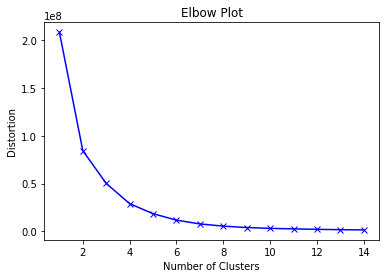

In [61]:
getelbowplot(df1)

In [62]:
df1.head()

,Orders.total
0,64.29
1,29.99
2,78.73
3,29.55
4,46.00


In [63]:
#corr = df1.corr()

#sns.heatmap(abs(corr),xticklabels=corr.columns, yticklabels=corr.columns)